# Analysis of Siren based trained models vs JPEG
---
- enable dark mode jupiter:
    - jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
- disable set theme:
    - jt -r

### Fetch Libs, and Data
---

In [1]:
# --- Import libs for running notebook.
from utils.libs import *

In [2]:
# --- Read config file for runnig notebook.
conf_file_path = 'conf.txt'
conf_data = read_conf_file(conf_file_path)
# pprint(conf_data)

In [3]:
# --- Define named tuple for query db to retrieve data.
# --- And, choose constraints to focus on certain Training runs.
constraints = get_constraints_for_query_db()

QueryConstraints(image={'type': <class 'str'>, 'val': ['cameramen']}, date=None, timestamp={'type': <class 'str'>, 'val': ['']}, hidden_features={'type': <class 'int'>, 'val': ['']}, image_size={'type': <class 'str'>, 'val': ['[256,256]']}, status={'type': <class 'str'>, 'val': ['done']})


In [4]:
# --- Fetch data about carryed out trainings.
# train_df, _, records_list = fetch_data(conf_data)
records_list, result_dict_df, query_str, chained_constraints = fetch_data_by_constraints(
    conf_data, constraints, fetch_data_downloaded = True)

SELECT image,date,timestamp,hidden_features,image_size,status,data_downloaded FROM table_runs_logged WHERE   (image = 'cameramen') AND (image_size = '[256,256]')  AND (status = 'done') ;


In [5]:
data = list(map(operator.methodcaller('_asdict'), records_list))
records_df = pd.DataFrame(data = data)

records_df.head(5)

image      date          timestamp  hidden_features image_size status  \
0  cameramen  23/10/20  1603478755-305517               75  [256,256]   done   
1  cameramen  24/10/20  1603557121-338703               55  [256,256]   done   
2  cameramen  25/10/20  1603583765-067812               55  [256,256]   done   
3  cameramen  26/10/20  1603672968-148557               85  [256,256]   done   
4  cameramen  26/10/20  1603731938-952001               85  [256,256]   done   

  data_downloaded                                          full_path  
0            TRUE  C:\\Users\\Francesco\\Documents\\tests\\siren-...  
1            TRUE  C:\\Users\\Francesco\\Documents\\tests\\siren-...  
2            TRUE  C:\\Users\\Francesco\\Documents\\tests\\siren-...  
3            TRUE  C:\\Users\\Francesco\\Documents\\tests\\siren-...  
4            TRUE  C:\\Users\\Francesco\\Documents\\tests\\siren-...

In [6]:
data = list(map(operator.itemgetter(1), result_dict_df.items()))
siren_df = pd.concat(data)

siren_df.head(5)

#params   seed    hl    hf       mse       psnr      ssim  \
1603478755-305517  57301.0    0.0  10.0  75.0  0.000006  58.145780  0.998769   
1603478755-305517  57301.0   42.0  10.0  75.0  0.000009  56.492704  0.998202   
1603478755-305517  57301.0  123.0  10.0  75.0  0.000006  58.214385  0.999085   
1603478755-305517  63001.0    0.0  11.0  75.0  0.000018  53.486111  0.997542   
1603478755-305517  63001.0   42.0  11.0  75.0  0.000005  58.401365  0.999003   

                           eta  
1603478755-305517  2688.703879  
1603478755-305517  2690.827056  
1603478755-305517  2686.608420  
1603478755-305517  2904.513145  
1603478755-305517  2906.302068

In [7]:
siren_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1603478755-305517 to 1603905451-45262
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #params  144 non-null    float64
 1   seed     144 non-null    float64
 2   hl       144 non-null    float64
 3   hf       144 non-null    float64
 4   mse      144 non-null    float64
 5   psnr     144 non-null    float64
 6   ssim     144 non-null    float64
 7   eta      144 non-null    float64
dtypes: float64(8)
memory usage: 10.1+ KB


In [8]:
siren_df.describe()

#params        seed          hl          hf           mse  \
count    144.00000  144.000000  144.000000  144.000000  1.440000e+02   
mean   41568.00000   55.000000    8.291667   69.875000  5.240141e-05   
std    21472.18496   51.227178    3.205928   15.014154  7.406398e-05   
min     9461.00000    0.000000    3.000000   45.000000  9.706207e-07   
25%    24913.50000    0.000000    5.750000   55.000000  1.043584e-05   
50%    37036.00000   42.000000    8.500000   64.000000  2.263126e-05   
75%    57398.50000  123.000000   11.000000   85.000000  6.222262e-05   
max    95371.00000  123.000000   13.000000   90.000000  4.519178e-04   

             psnr        ssim          eta  
count  144.000000  144.000000   144.000000  
mean    52.023422    0.995642  1989.981213  
std      5.404762    0.005447   652.588717  
min     39.305184    0.959150   913.606552  
25%     48.062040    0.994240  1494.889452  
50%     52.513548    0.997453  1936.896151  
75%     55.851124    0.998854  2372.567649  
max     65.722240    0.999817  3499.902338

### Calculate Jpge
---

Image size: (512, 512)


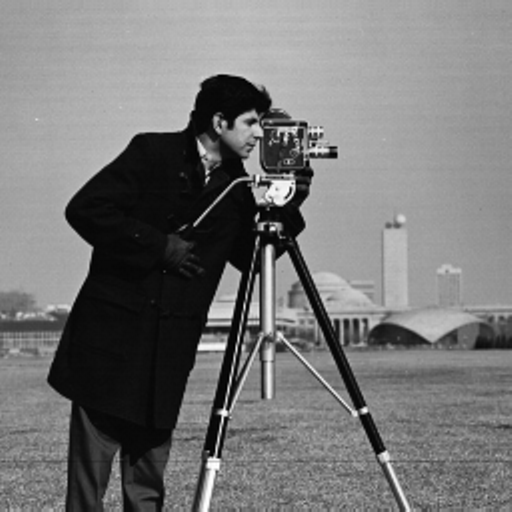

In [9]:
# --- Load target image.
im = load_target_image(image_file_path = None)
print('Image size:', im.size)
im

In [10]:
crop_size = conf_data['cropped_image']['crop_size']
if isinstance(crop_size, str):
    crop_size = eval(crop_size)
elif isinstance(crop_size, int):
    crop_size = (crop_size, crop_size)
    pass
# type(crop_size[0])

Image size: (256, 256)


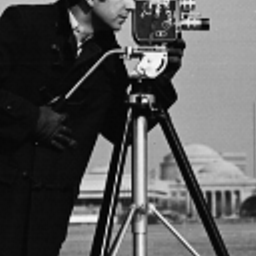

In [11]:
if conf_data['cropped_image']['flag'] is True:
    im_cropped = get_cropped_by_center_image(im, target = crop_size)
    pass
else:
    im_cropped = im
print('Image size:', im_cropped.size)
im_cropped

In [12]:
# --- Array of qualities to be tested in compression.
qualities_arr = np.arange(20, 95+1, dtype = np.int)

In [13]:
# --- Run several trials for JPEG compression.
cropped_file_size_bits = None
with BytesIO() as f:
    im_cropped.save(f, format='PNG')
    cropped_file_size_bits = f.getbuffer().nbytes * 8
    pass
result_tuples, failure_qualities = \
  calculate_several_jpeg_compression(im_cropped, cropped_file_size_bits, qualities_arr)

In [14]:
# data = list(map(lambda xx: xx._asdict(), result_tuples))
data = list(map(operator.methodcaller('_asdict'), result_tuples))
jpeg_df = pd.DataFrame(data = data)
jpeg_df.head(5)

mse       psnr      ssim  quality  file_size_bits       bpp  width  \
0  30.618301  33.270993  0.939424       20           33064  0.504517    256   
1  28.949783  33.514350  0.940436       21           33968  0.518311    256   
2  27.839966  33.684117  0.941620       22           34736  0.530029    256   
3  26.316681  33.928492  0.944786       23           35408  0.540283    256   
4  25.208344  34.115361  0.946817       24           36000  0.549316    256   

   heigth        CR  
0     256  7.682071  
1     256  7.477626  
2     256  7.312298  
3     256  7.173520  
4     256  7.055556

### Show graphics: 
---

#### Graphics about:
- merged JPEG Dataframe and Siren Dataframe

#### First, Merge Dataframes

In [15]:
# Metadata for merging dataframes.
vars_dict = dict(
    image=im_cropped,                                                                  # Target Image , either cropped or not.
    siren_columns_for_merge="mse,psnr,ssim,CR,bpp,file_size_bits,compression".split(","),  # Here, list siren_df columns for merge purpose.
    jpeg_columns_for_merge="mse,psnr,ssim,CR,bpp,file_size_bits,compression".split(","),   # Here, list jpeg_df columns for merge purpose.
    columns_names_merge="mse,psnr,ssim,CR,bpp,file_size_bits,compression".split(","),      # Here, list new columns name after merge.
)
# vars_dict

In [16]:
# Perform merging.
merged_df, siren_df, jpeg_df = prepare_and_merge_target_dfs(
    siren_df, jpeg_df,
    **vars_dict
)

#### Summary Scatterplot Graphic:
---
Scatter plot about merged **siren_df**, and **jpeg_df**:

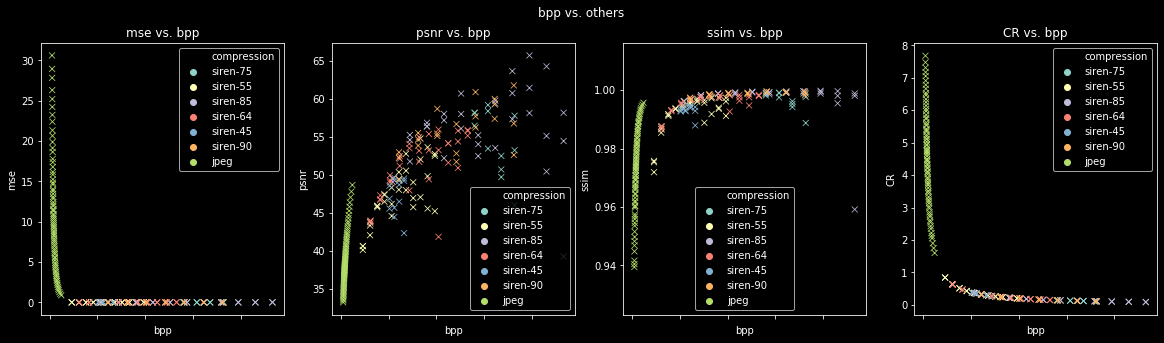

In [17]:
hue = "compression"; x = 'bpp'
x_vars = "bpp,file_size_bits".split(","); y_vars = "mse,psnr,ssim,CR".split(",")
fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")
for ax, y in zip(axes, y_vars):
    chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

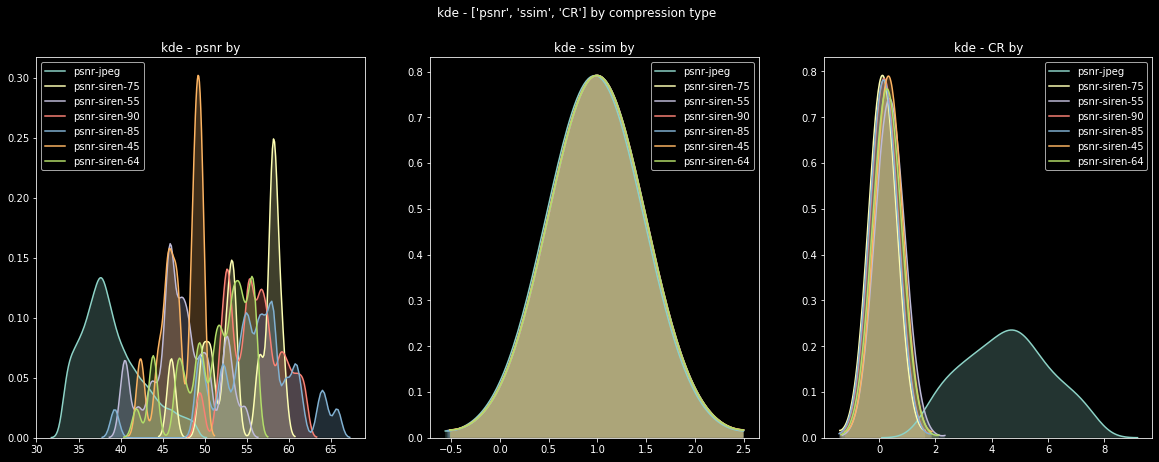

In [18]:
target_features = 'psnr,ssim,CR'.split(",")
fig, axes = plt.subplots(1, len(target_features), figsize = (20, 7))
for pos, target_feature in enumerate(target_features):
    for c in set(merged_df['compression'].values):
        sns.kdeplot(merged_df[merged_df['compression'] == f'{c}'][f'{target_feature}'], shade=True, bw=.5, label = f'psnr-{c}', ax = axes[pos])
        pass
    axes[pos].set_title(f'kde - {target_feature} by')
    pass
fig.suptitle(f'kde - {target_features} by compression type')
plt.show()

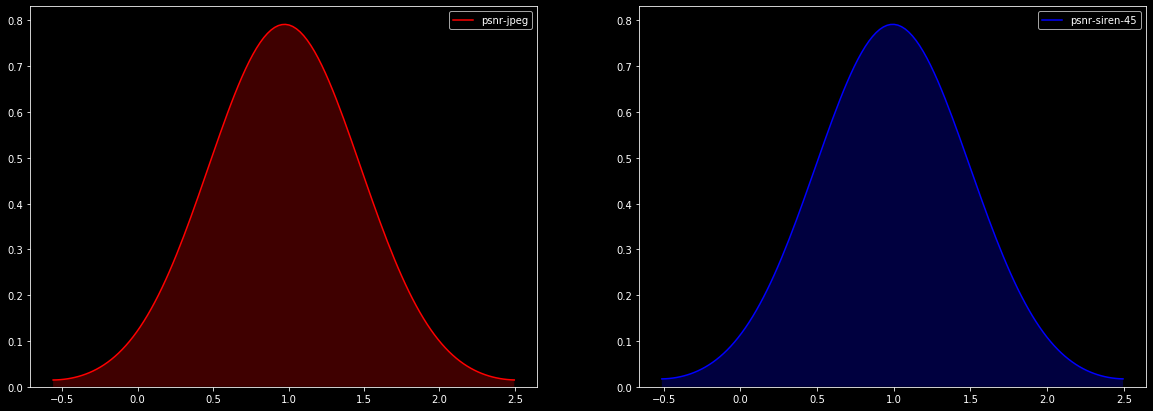

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7))
c = 'jpeg'; target_feature = 'ssim'
sns.kdeplot(merged_df[merged_df['compression'] == f'{c}'][f'{target_feature}'], shade=True, bw=.5, label = f'psnr-{c}', ax = axes[0], color = 'r')
c = 'siren-45'; target_feature = 'ssim'
sns.kdeplot(merged_df[merged_df['compression'] == f'{c}'][f'{target_feature}'], shade=True, bw=.5, label = f'psnr-{c}', ax = axes[1], color = 'b')
plt.show()

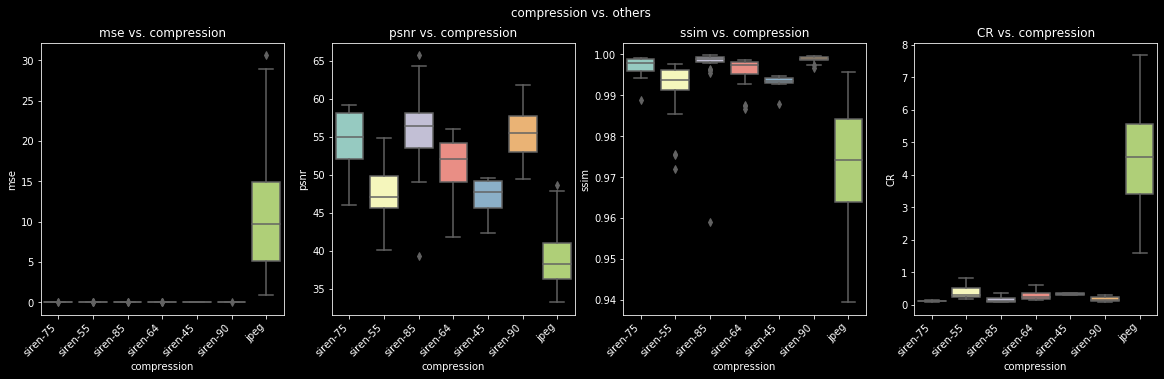

In [20]:
x = 'compression'; y_vars = "mse,psnr,ssim,CR".split(",")[:]
fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")
for ax, y in zip(axes, y_vars):
    chart = sns.boxplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax)
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

#### PSNR Analysis
---
Scatter plot about merged siren_df, and jpeg_df, where PSNR vs. BPP is shown:
 -  firstly, without making distinction amongst several siren-trials,
 - then, showing also how several siren-trials behave.

In [21]:
tmp_res = [merged_df.groupby(by = ['compression']).min(), merged_df.groupby(by = ['compression']).max()]
pd.concat(tmp_res, axis=1)

mse       psnr      ssim        CR        bpp  \
compression                                                           
jpeg         8.784332e-01  33.270993  0.939424  1.598449   0.504517   
siren-45     4.306167e-05  42.369062  0.987958  0.292994  10.195801   
siren-55     1.322129e-05  40.158850  0.971919  0.197151   4.619629   
siren-64     8.570572e-06  41.880483  0.986566  0.146079   6.219238   
siren-75     4.557864e-06  46.030593  0.988788  0.106685  27.979004   
siren-85     9.706207e-07  39.305184  0.959150  0.083228  10.874512   
siren-90     2.515312e-06  49.422984  0.996646  0.107161  12.173340   

             file_size_bits        mse       psnr      ssim        CR  \
compression                                                             
jpeg                33064.0  30.618301  48.693716  0.995725  7.682071   
siren-45           668192.0   0.000183  49.639914  0.994646  0.380130   
siren-55           302752.0   0.000385  54.804481  0.997690  0.838971   
siren-64           407584.0   0.000211  55.984903  0.998540  0.623184   
siren-75          1833632.0   0.000098  59.208228  0.999173  0.138523   
siren-85           712672.0   0.000452  65.722240  0.999817  0.356405   
siren-90           797792.0   0.000042  61.784156  0.999628  0.318379   

                   bpp  file_size_bits  
compression                             
jpeg          2.424683        158904.0  
siren-45     13.228027        866912.0  
siren-55     19.658691       1288352.0  
siren-64     26.531738       1738784.0  
siren-75     36.328613       2380832.0  
siren-85     46.567871       3051872.0  
siren-90     36.167480       2370272.0

In [22]:
x = 'bpp'; y = "psnr"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
fig.show()

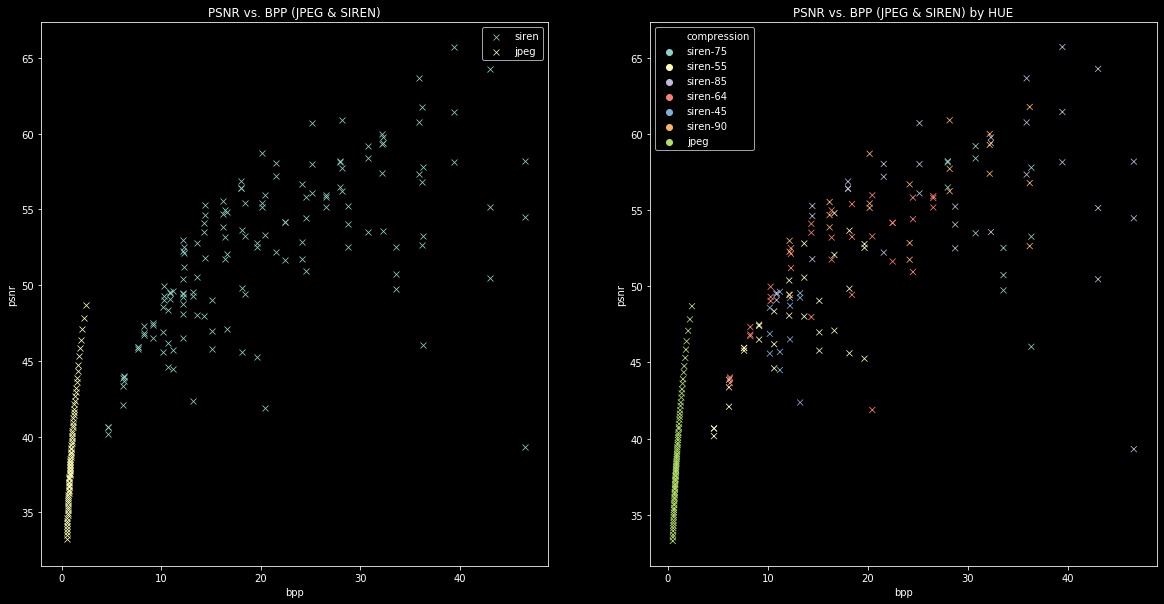

In [23]:
x = 'bpp'; y = "psnr"
fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])
axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

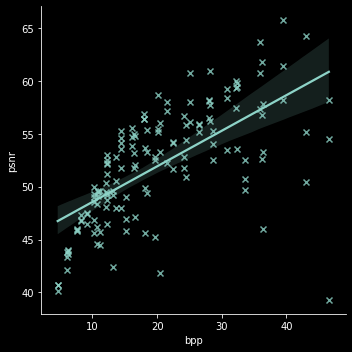

In [24]:
# Plot sepal width as a function of sepal_length across days
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]
g = sns.lmplot(
    data=merged_df[merged_df['compression'] != 'jpeg'],
    x="bpp", y="psnr",
    height=5,
    order=1, markers=markers[0]
).fig.subplots_adjust(wspace=.02)

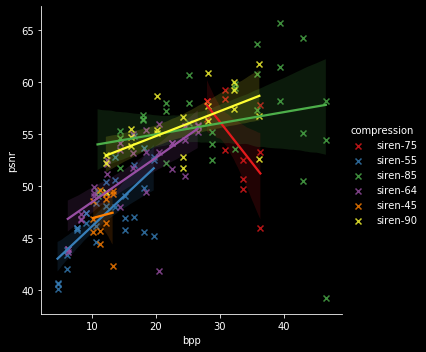

In [25]:
# Plot sepal width as a function of sepal_length across days
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]
g = sns.lmplot(
    data=merged_df[merged_df['compression'] != 'jpeg'],
    x="bpp", y="psnr", hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers[:-1]
).fig.subplots_adjust(wspace=.02)

#### MSE Analysis (Siren DF only)
---

In [26]:
x = 'bpp'; y = "mse"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
fig.show()

In [27]:
x = 'bpp'; y = "mse"; hue='compression'
fig = px.scatter(siren_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren-df')
fig.show()

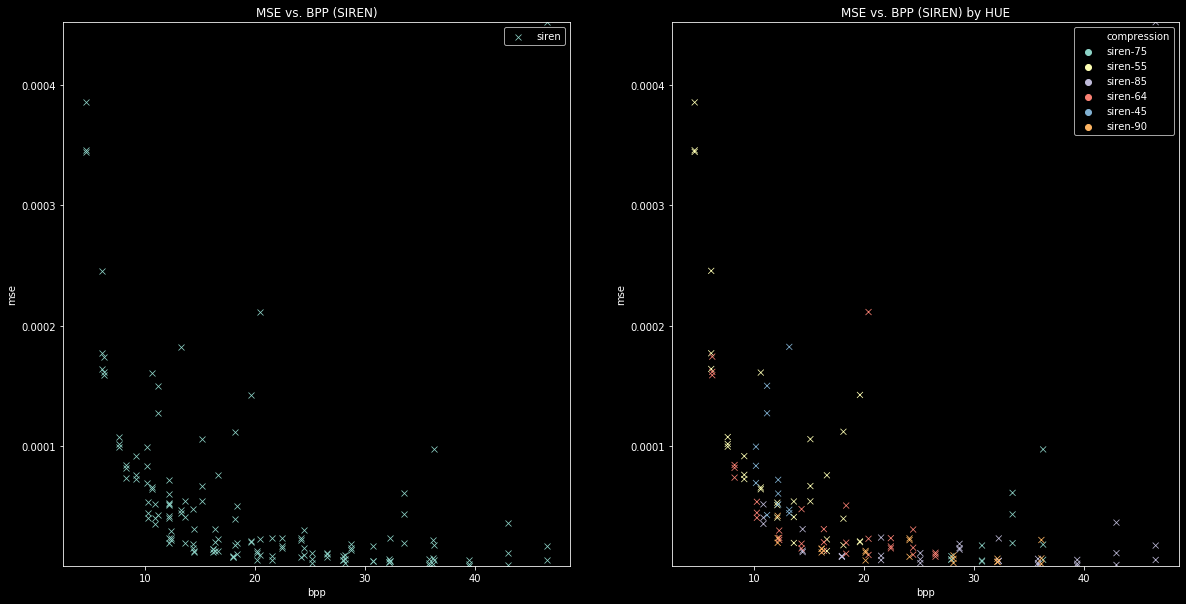

In [28]:
x = 'bpp'; y = "mse"
fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
axes[0].set_title(f'{y.upper()} vs. {x.upper()} (SIREN)')
axes[0].set_ylim(siren_df[y].values.min(), siren_df[y].values.max())

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=siren_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (SIREN) by HUE')
axes[1].set_ylim(siren_df[y].values.min(), siren_df[y].values.max())
plt.show()

<Figure size 432x288 with 0 Axes>

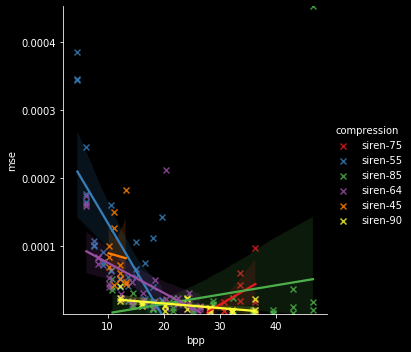

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot sepal width as a function of sepal_length across days
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]
g = sns.lmplot(
    data=siren_df[siren_df['compression'] != 'jpeg'],
    x="bpp", y="mse",
    hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers[:-1]
    # markers=markers[0]
) # .fig.subplots_adjust(wspace=.02)
g.set(ylim=(siren_df['mse'].values.min(), siren_df['mse'].values.max()))
plt.figure()

#### SSIM Analysis
---

In [30]:
x = 'bpp'; y = "ssim"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
fig.show()

In [31]:
x = 'bpp'; y = "ssim"; hue='compression'
fig = px.scatter(siren_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren-df')
fig.show()

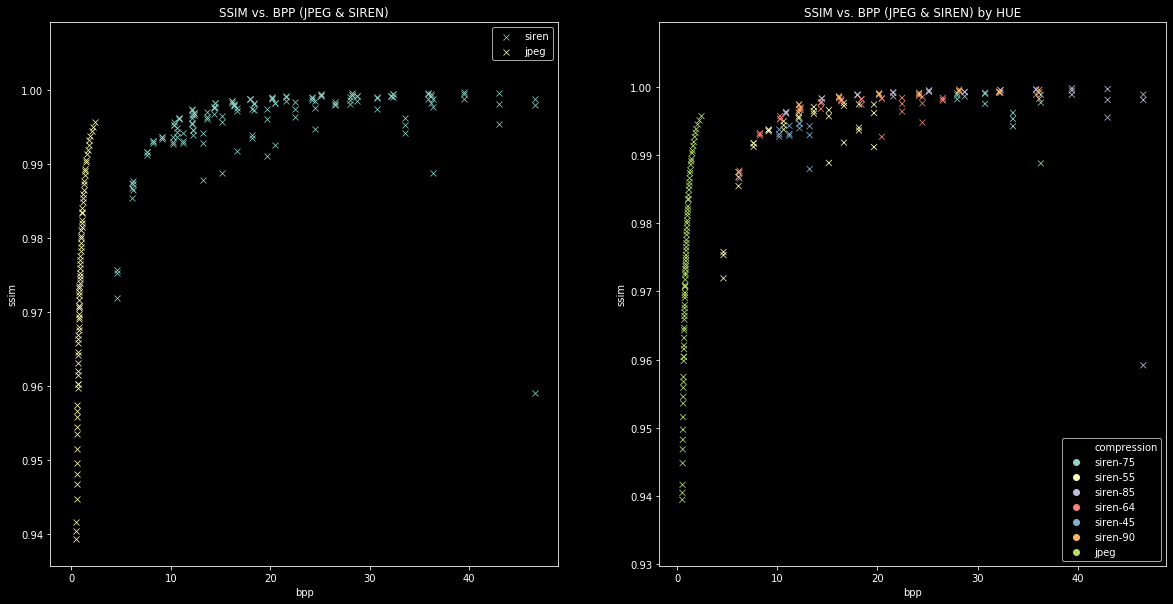

In [32]:
x = 'bpp'; y = "ssim"

fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

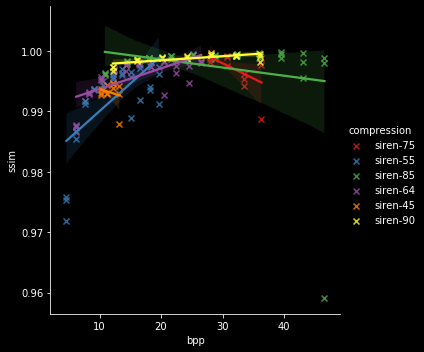

In [33]:
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]
g = sns.lmplot(
    data=siren_df[siren_df['compression'] != 'jpeg'],
    x="bpp", y="ssim", hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers[:-1]
).fig.subplots_adjust(wspace=.02)

#### Compression Ratio Analysis
---

In [34]:
x = 'bpp'; y = "CR"; hue='compression'
fig = px.scatter(merged_df, x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
fig.show()

In [35]:
x = 'bpp'; y = "CR"; hue='compression'
fig = px.scatter(siren_df[siren_df[hue]  != 'jpeg'], x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
fig.show()

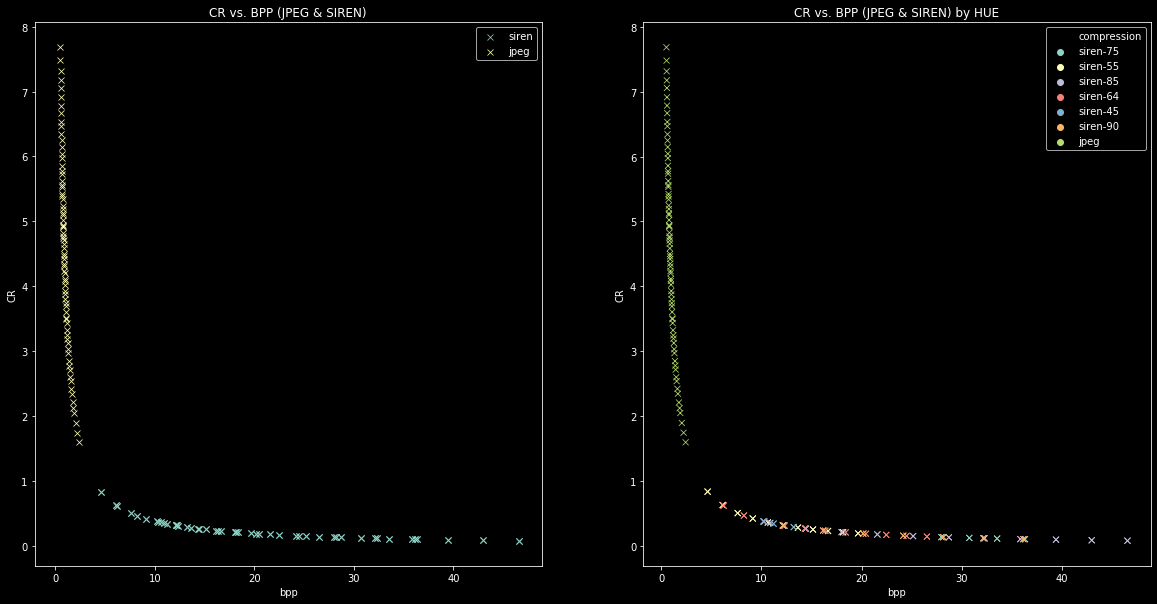

In [36]:
x = 'bpp'; y = "CR"

fig, axes  = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data = siren_df, x=f"{x}", y=f"{y}", label = 'siren', marker = 'x', ax = axes[0])
sns.scatterplot(data = jpeg_df, x=f"{x}", y=f"{y}", label = 'jpeg', marker = 'x', ax = axes[0])

axes[0].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN)')

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, hue='compression', marker='x', ax = axes[1])
axes[1].set_title(f'{y.upper()} vs. {x.upper()} (JPEG & SIREN) by HUE')
plt.show()

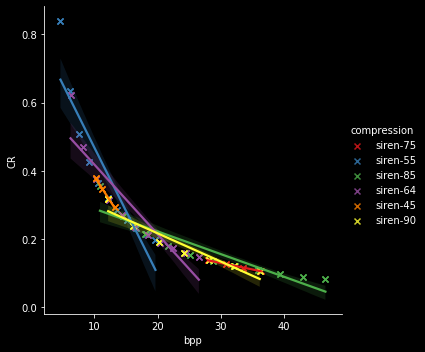

In [37]:
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]
g = sns.lmplot(
    data=siren_df[siren_df['compression'] != 'jpeg'],
    x="bpp", y="CR", hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers[:-1]
).fig.subplots_adjust(wspace=.02)

#### Other summary plots
---

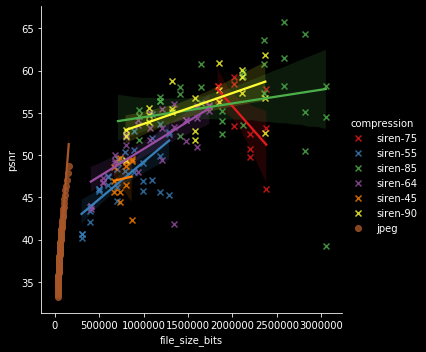

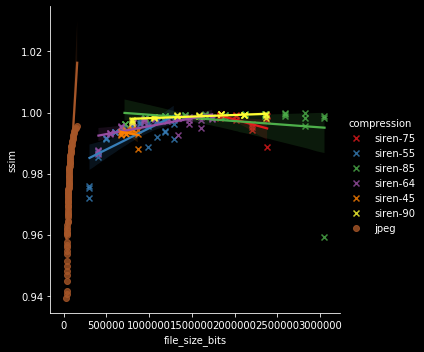

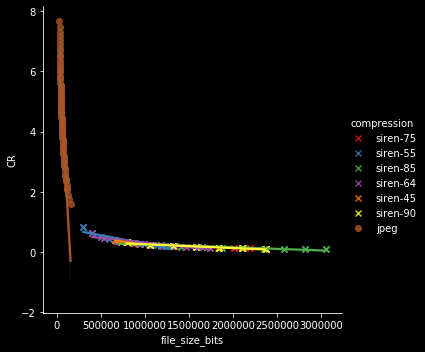

In [38]:
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

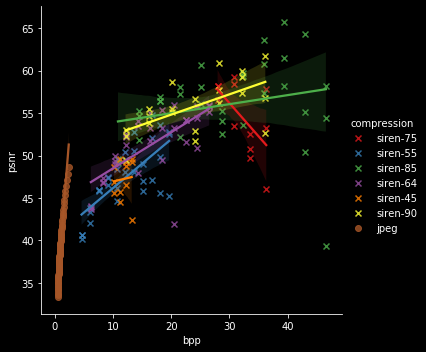

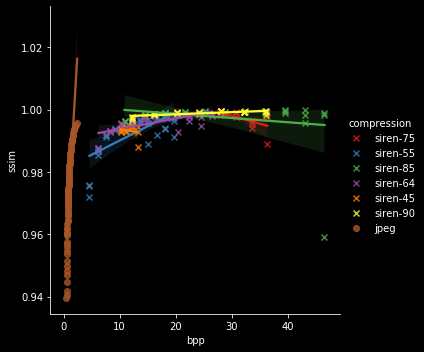

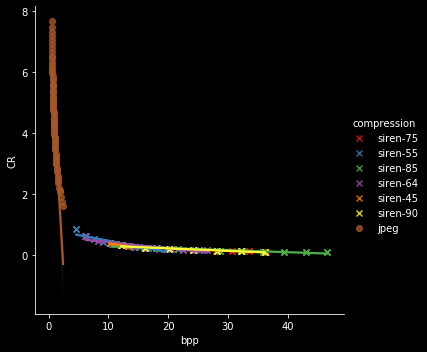

In [39]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

In [40]:
x = 'bpp'; hue='compression'
y_list = "mse,psnr,ssim,CR".split(",")
figs_list = []; templates = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
for y in y_list:
    print(f'Processing: {y}')
    fig = px.scatter(merged_df, template = templates[2], x=f"{x}", y=f"{y}", color=f"{hue}",title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren+jpeg df')
    figs_list.append(fig)
    pass

Processing: mse
Processing: psnr
Processing: ssim
Processing: CR


In [41]:
x = 'compression'; y = 'psnr'; y_list = "mse,psnr,ssim,CR".split(",")
for y in y_list:
    print(f'Processing: {y}')
    fig = px.box(merged_df, template = templates[2], x =f"{x}",  y=f"{y}")
    fig.update_layout(title_text=f'{y.upper()} | Groupped by {hue} | siren+jpeg dataframes')
    figs_list.append(fig)
    pass

Processing: mse
Processing: psnr
Processing: ssim
Processing: CR


In [42]:
groups_dict = merged_df.groupby(by = ['compression']).groups
indices_dict = merged_df.groupby(by = ['compression']).indices
group_labels = list(map(operator.itemgetter(0), groups_dict.items()))
indices_arr = list(map(operator.itemgetter(1), indices_dict.items()))

y_list = "mse,psnr,ssim,CR".split(","); hue = 'compression' # y = 'psnr';
for y in y_list:
    print(f'Processing: {y}')
    hist_data = [merged_df.iloc[indeces][f'{y}'].values for indeces in indices_arr]
    fig = ff.create_distplot(hist_data, group_labels, show_rug=True)
    fig.update_layout(template = templates[2], title_text=f'{y.upper()} | Groupped by {hue} | siren+jpeg dataframes')

    x_min, x_max = merged_df[f'{y}'].values.min(), merged_df[f'{y}'].values.max()
    fig.update_xaxes(range=[x_min, x_max])
    figs_list.append(fig)
    pass

Processing: mse
Processing: psnr
Processing: ssim
Processing: CR


In [43]:
figs_list_siren = []
# kde-siren
# Sinre MSE graphics:
x = 'bpp'; y = "mse"; hue='compression'
# scatter-siren
fig = px.scatter(siren_df, x=f"{x}", y=f"{y}", color=f"{hue}")# ,title=f'{y.upper()} vs. {x.upper()} | gropude by {hue.upper()} in siren-df')
fig.update_layout(template = templates[2], title_text=f'{y.upper()} | Groupped by {hue} | siren-df')
figs_list_siren.append(fig)

# box-siren
fig = px.box(siren_df, template = templates[2], x =f"{hue}",  y=f"{y}")
fig.update_layout(template = templates[2], title_text=f'{y.upper()} | Groupped by {hue} | siren-df')
figs_list_siren.append(fig)

# kde-siren
groups_dict = siren_df.groupby(by = ['compression']).groups
indices_dict = siren_df.groupby(by = ['compression']).indices
group_labels = list(map(operator.itemgetter(0), groups_dict.items()))
indices_arr = list(map(operator.itemgetter(1), indices_dict.items()))

hist_data = [siren_df.iloc[indeces][f'{y}'].values for indeces in indices_arr]
fig = ff.create_distplot(hist_data, group_labels, show_rug=True)
fig.update_layout(template = templates[2], title_text=f'{y.upper()} | Groupped by {hue} | siren-df')

x_min, x_max = siren_df[f'{y}'].values.min(), siren_df[f'{y}'].values.max()
fig.update_xaxes(range=[x_min, x_max])
figs_list_siren.append(fig)

old_figs_list_siren = copy.deepcopy(figs_list_siren)
figs_list_siren = list(map(lambda fig: dcc.Graph(figure=fig), figs_list_siren))

In [44]:
old_figs_list = copy.deepcopy(figs_list)
figs_list = list(map(lambda fig: dcc.Graph(figure=fig), figs_list))

In [ ]:
app = get_dash_app(figs_list, figs_list_siren, len(y_list))
app.run_server(debug=True, use_reloader=False, host='localhost')  # Turn off reloader if inside Jupyter

# app = dash.Dash()
# app = dash.Dash('Example', external_stylesheets=[dbc.themes.DARKLY])
# app.layout = html.Div([ dcc.Graph(figure=fig), dcc.Graph(figure=fig), dcc.Graph(figure=fig),])

# app.layout = html.Div(figs_list)

Dash is running on http://localhost:8050/

 * Serving Flask app "Siren+Jpeg Results" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


### References:
---
#### Standard Libs:
  - [Lib/statistics.py](https://docs.python.org/3/library/statistics.html)
---
#### Seaborn:
  - [seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=reg)
---
#### Drawing from data:
  - [drawingfromdata](https://www.drawingfromdata.com/)
  - [HOW TO ROTATE AXIS LABELS IN SEABORN AND MATPLOTLIB](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib)
  ---
#### Plotly:
  - [Box Plots in Python](https://plotly.com/python/box-plots/)
  - [Distplots in Python](https://plotly.com/python/distplot/)

#### Dask:
---
- [home page](https://dask.org/)